In [1]:
using Plots
include("layers.jl")

color (generic function with 1 method)

In [2]:
layer1 = FullyConnected(size=(5, 3))
layer2 = FullyConnected(size=(9, 5))
layer3 = FullyConnected(size=(1, 9))
net = Network([layer1, layer2, layer3]);

In [3]:
x = [1., 2., 4.]
@time forward(x, net)
net.depth
y = 1
@time backward(y, net)
@time update(net)

  9.162844 seconds (29.60 M allocations: 1.576 GiB, 4.79% gc time, 99.98% compilation time)
  0.841886 seconds (2.86 M allocations: 158.048 MiB, 4.54% gc time, 99.56% compilation time)
  0.148254 seconds (654.46 k allocations: 33.548 MiB, 99.60% compilation time)


backward(1, net)
net.gradloss

In [39]:
net = Network([FullyConnected(size=(8, 2)),
               FullyConnected(size=(16, 8)),
               FullyConnected(size=(1, 16))]);
X = [];
Y = [];
losses = [];
n = 100;
for i in 1:n
    x = rand(2)
    if x[1]^2 + x[2]^2 < 0.2
        y = 1
    else
        y = 0
    end
    X = append!(X, [x])
    Y = append!(Y, y) 

    forward(x, net)
    backward(y, net)
    update(net)
    losses = append!(losses, net.loss)
end


In [19]:
X = [];
Yt = [];
n = 1000;
for i in 1:n
    x = rand(2)
    if (x[1] - 0.5)^2 + (x[2] - 0.5)^2 < 0.05
        y = 1
    else
        y = 0
    end
    X = append!(X, [x])
    Yt = append!(Yt, y) 
end
X1 = [X[i][1] for i in 1:n]
X2 = [X[i][2] for i in 1:n]

net = Network([FullyConnected(size=(8, 2), activation=sigmoid),
               FullyConnected(size=(20, 8), activation=sigmoid),
               FullyConnected(size=(1, 20), activation=sigmoid)]);
train(net, X, Yt, 5e-6)
Yp = predict(net, X)
println(100. * count(Yp - Yt .== 0) / n, "% success rate")

85.6% success rate


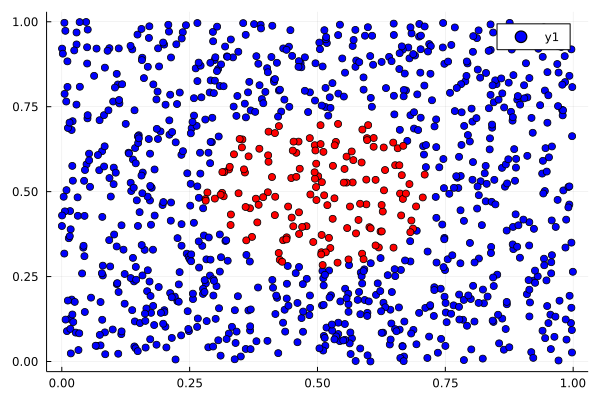

In [21]:
plot(X1, X2, markercolor=color.(Yt), seriestype=:scatter)

In [26]:
predict(net, X)

1000-element Vector{Any}:
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 ⋮
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0